In [ ]:
import os
import pandas as pd

# Use relative path so it works anywhere
DATA_PATH = os.path.join("data", "WA_Fn-UseC_-Telco-Customer-Churn.csv")

df = pd.read_csv(DATA_PATH)
print(df.head())

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder , OneHotEncoder
#we have also the MinMaxscaler
from sklearn.linear_model import LinearRegression, LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
# from sklearn.naive_bayes import GaussianNB
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score
import missingno as msno
import warnings

#The workflow
1- EDA : 
   1-1 shape , size , type of data -> correct the type if need
   1-2 


# Data exploration

In [ ]:
customer_df = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
customer_df.shape

(7043, 21)

In [ ]:
#all columns
customer_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
customer_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#only numeric columns
customer_df.describe().columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')

<Axes: >

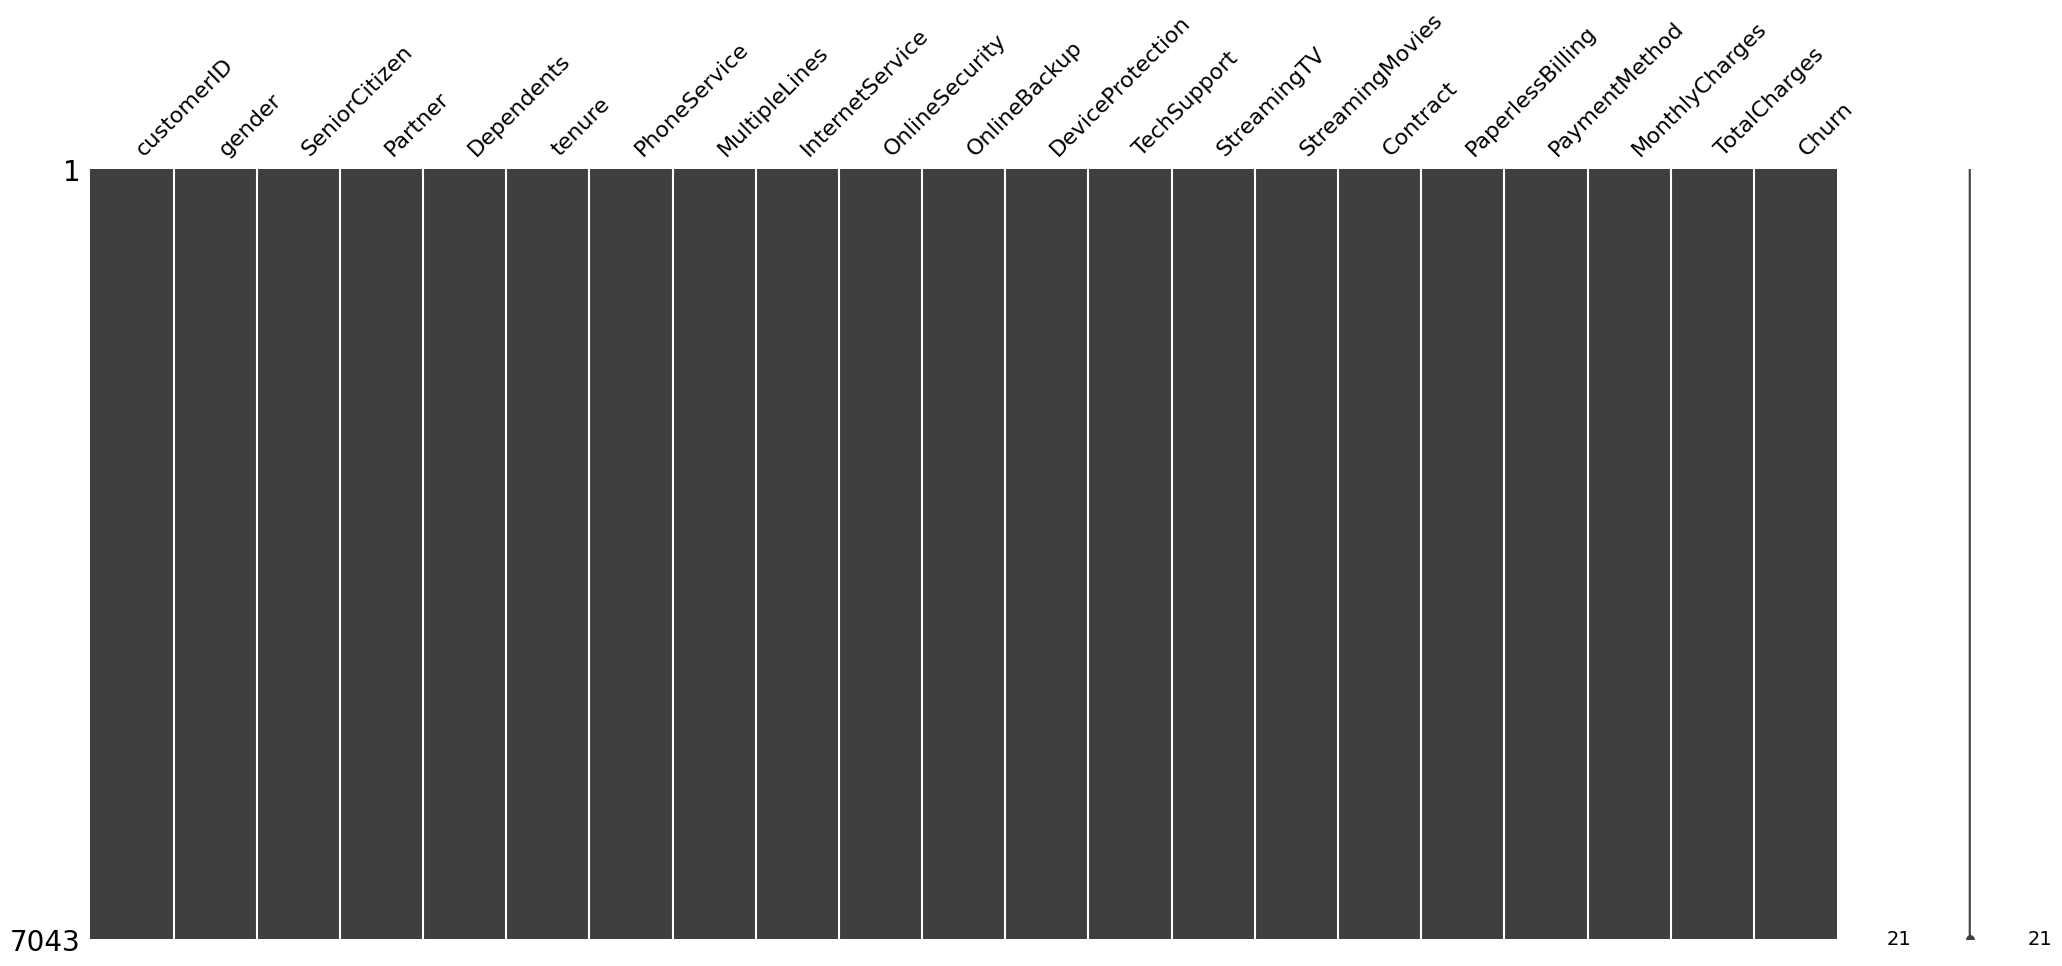

In [ ]:
# Visualize missing values as a matrix
msno.matrix(customer_df)

From the above visualisation we can observe that it has no peculiar pattern that stands out. In fact there is no missing data.

In [ ]:
#please check the following code again 
# Shows if missing values in one column are related to missing in another
#msno.dendrogram(customer_df)
#plt.show()

In [ ]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
#printing some columns to confirm the type
print(customer_df['TotalCharges'])
#so I understand that I have to change the type of this column

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object


The values of this column are float but the type in the info results is not corret so I have to correct it

# Data Cleaning 

In [ ]:
# #Quick Type Conversion for EDA
# the following line will generate an error
# customer_df['TotalCharges'] = customer_df['TotalCharges'].astype('float64')
#this will convert all rows
# → Converts valid numbers, converts invalid to NaN
customer_df['TotalCharges'] = pd.to_numeric(customer_df['TotalCharges'], errors='coerce')

In [ ]:
# Show all rows where TotalCharges can't be converted to numeric
print(customer_df[pd.to_numeric(customer_df['TotalCharges'], errors='coerce').isna()][['customerID', 'TotalCharges']])

      customerID  TotalCharges
488   4472-LVYGI           NaN
753   3115-CZMZD           NaN
936   5709-LVOEQ           NaN
1082  4367-NUYAO           NaN
1340  1371-DWPAZ           NaN
3331  7644-OMVMY           NaN
3826  3213-VVOLG           NaN
4380  2520-SGTTA           NaN
5218  2923-ARZLG           NaN
6670  4075-WKNIU           NaN
6754  2775-SEFEE           NaN


Here we see that the TotalCharges has 11 missing values. Let's check this data.

In [ ]:
#customer_df[np.isnan(customer_df['TotalCharges'])]

I have to understand why I have these missing values to decide what to do next

In [ ]:
# Show all rows where TotalCharges can't be converted to numeric with other columns
#to understand why do we have missing values
No_total = customer_df[pd.to_numeric(customer_df['TotalCharges'], errors='coerce').isna()]
print(No_total['MonthlyCharges'].value_counts())
#the following print to understand why we have spaces 
# print(No_total)
print(No_total['tenure'].value_counts())
print(len(customer_df[customer_df['tenure']==0]))
#we understand that when the tenure is 

MonthlyCharges
52.55    1
20.25    1
80.85    1
25.75    1
56.05    1
19.85    1
25.35    1
20.00    1
19.70    1
73.35    1
61.90    1
Name: count, dtype: int64
tenure
0    11
Name: count, dtype: int64
11


Here I understand that missing values are in columns with tenure = 0 

In [ ]:
# I can replace all the nan values in the Totalcharges with Monthly charges 
# Replace NaN in TotalCharges with corresponding MonthlyCharges
# customer_df['TotalCharges']=customer_df['TotalCharges'].fillna(0)
customer_df = customer_df.dropna(subset=['TotalCharges'])

let's verify if there is any other nan values

In [ ]:
customer_df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**Advice : when changing the type with to_numeric check again if there is any missing values in your data again !!!**

In [ ]:
customer_df.duplicated().sum()

0

I wanna map the 

In [ ]:
customer_df['SeniorCitizen'].map({0:'No',1:'Yes'})

0        No
1        No
2        No
3        No
4        No
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: SeniorCitizen, Length: 7032, dtype: object

# EDA

In [ ]:
#numeric columns
num_col =['tenure','MonthlyCharges','TotalCharges']

In [ ]:
#compare churn rate across tenure MonthlyCharges TotalCharges 
pd.pivot_table(customer_df,index='Churn',values=num_col)
#why I did this??$

,MonthlyCharges,TotalCharges,tenure
Churn,,,
No,61.307408,2555.344141,37.650010
Yes,74.441332,1531.796094,17.979133


In [ ]:
customer_df.describe(include=['O'])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,7032,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


In [ ]:
#Spliting the columns into 3 categories 
#One for standardization -> numerical features 
#One for label encoding
#One for one hot encoding

array([[<Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'MonthlyCharges'}>],
       [<Axes: title={'center': 'TotalCharges'}>, <Axes: >]], dtype=object)

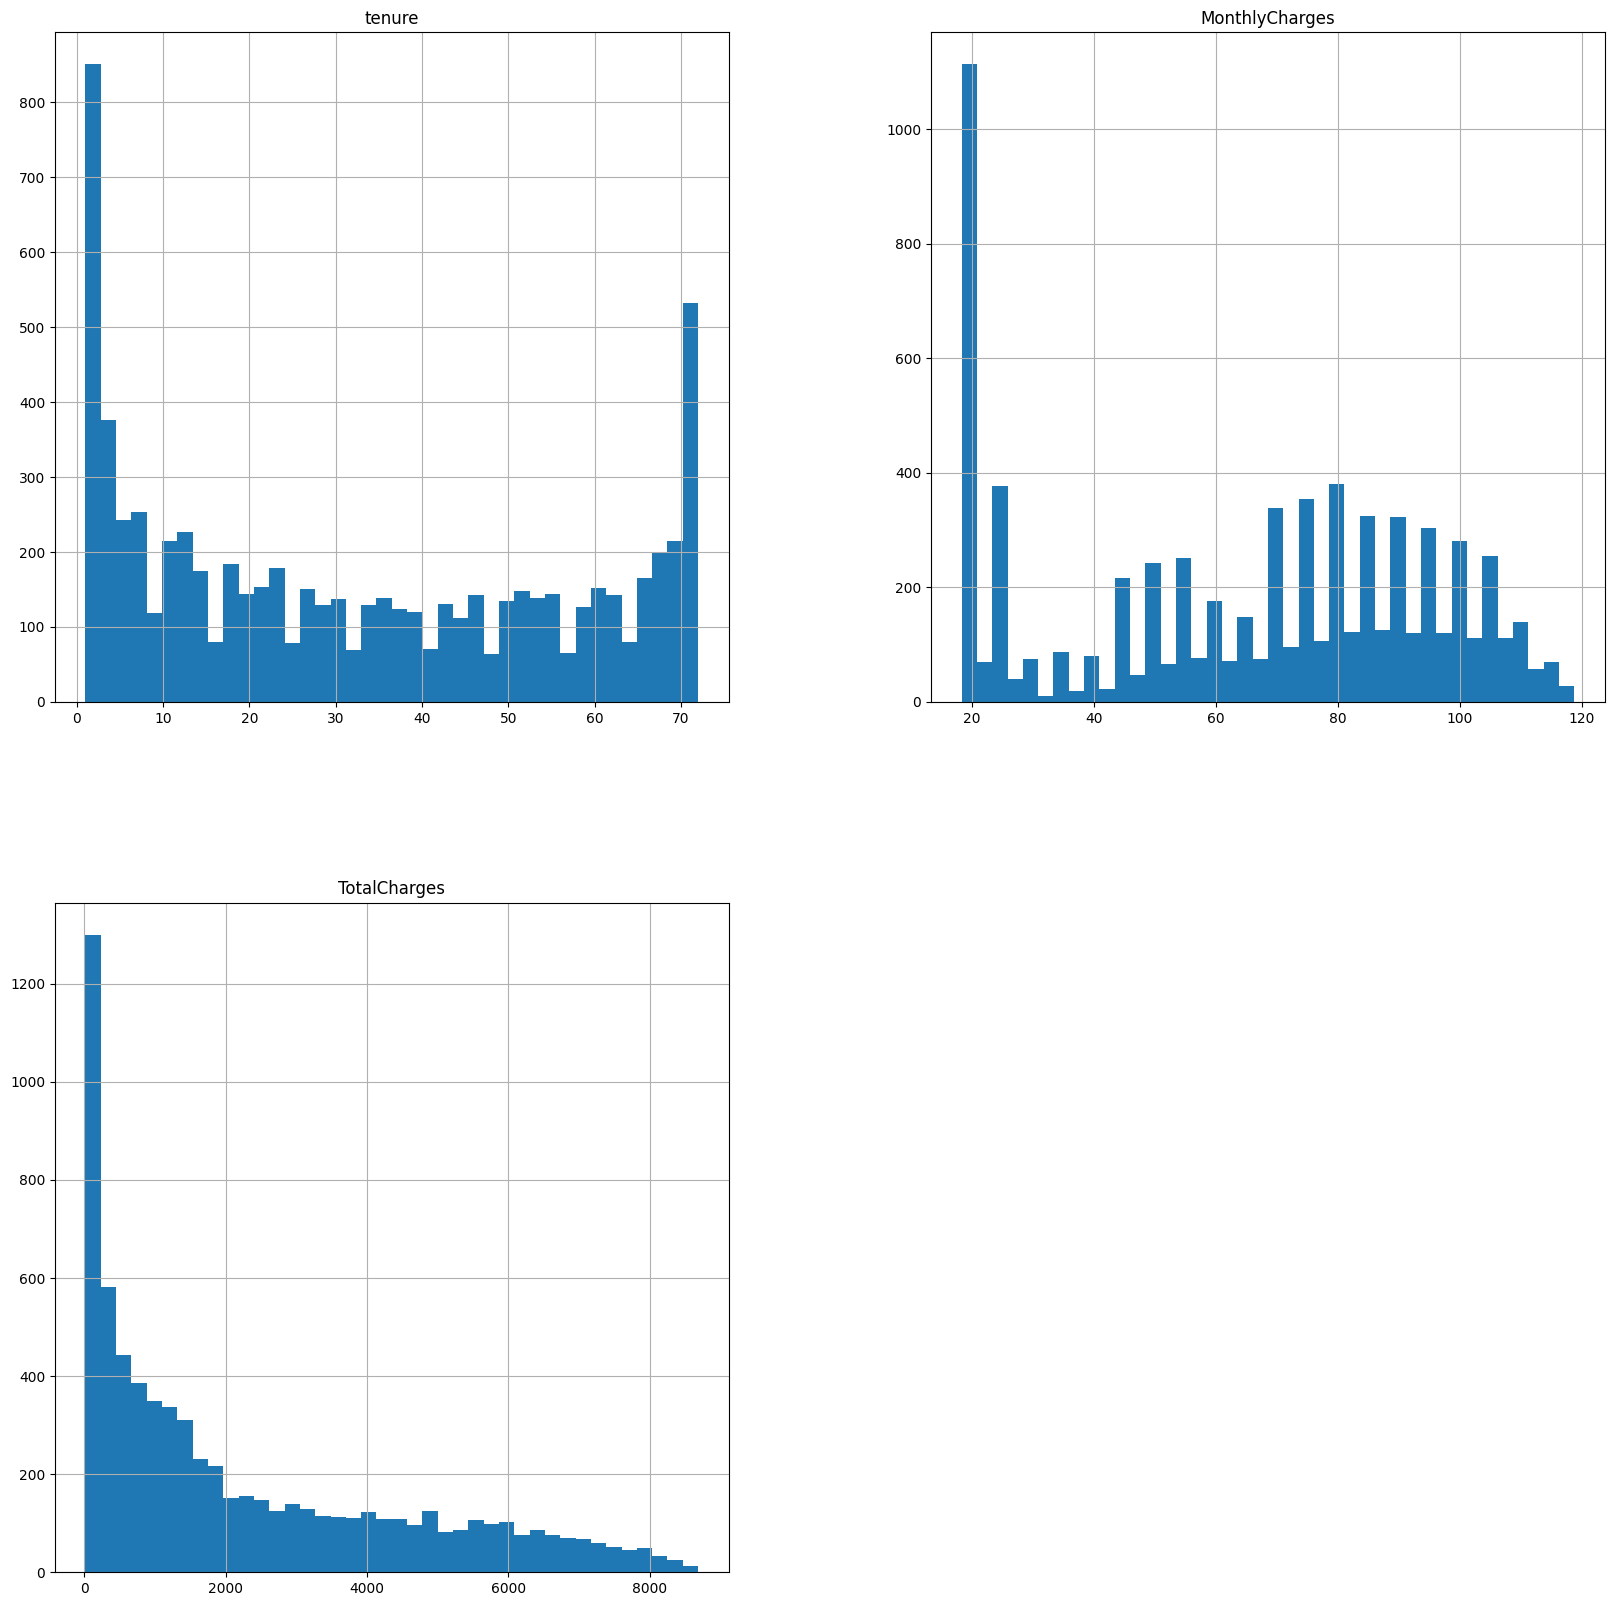

In [ ]:
customer_df[num_col].hist(bins=40,figsize=(20,20))

In [ ]:
# "categorical columns"
cat_col =['gender','SeniorCitizen','Partner', 'Dependents'
        , 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']

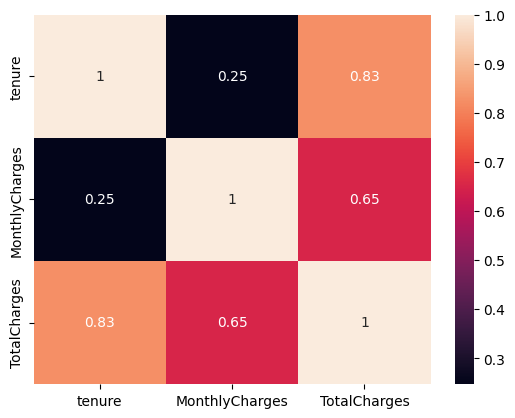

In [ ]:
sns.heatmap(customer_df[num_col].corr(),annot=True)
plt.show()

# Data pre-processing

1. Handle Missing Values
2. Fix Data Types
3. Handle Outliers
4. Standardize Formats

In [ ]:
customer_df.drop('customerID',axis=1,inplace=True)
customer_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
customer_df_ =customer_df

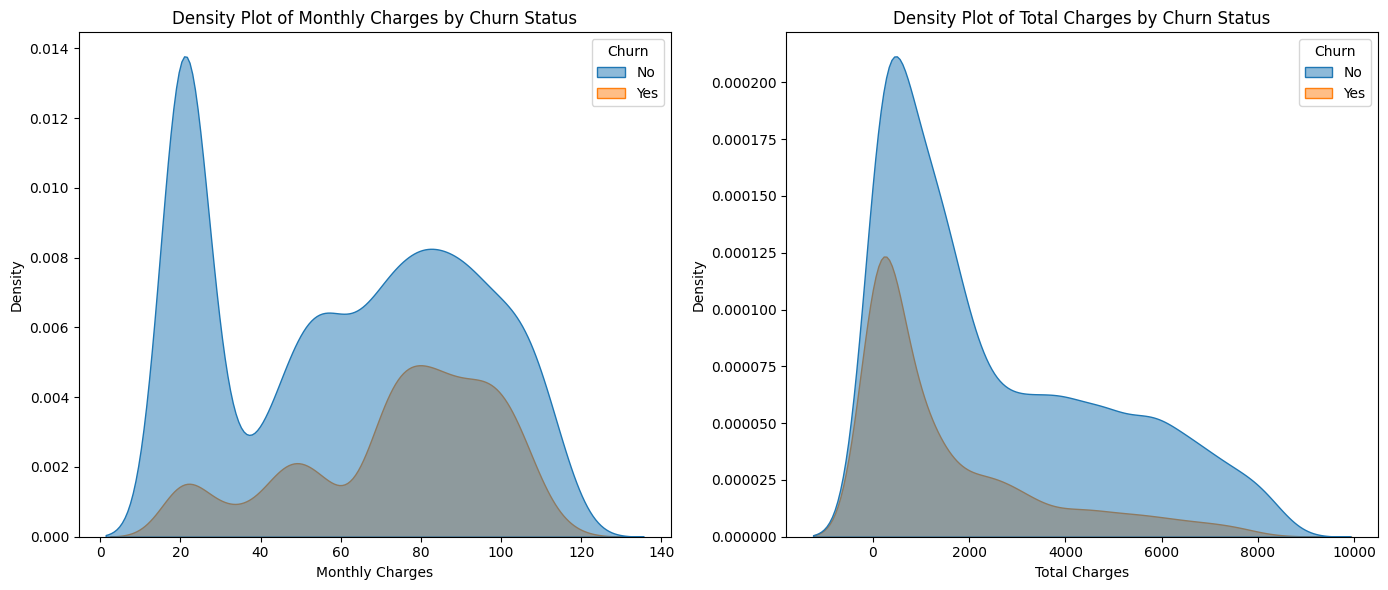

In [ ]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for Monthly Charges
sns.kdeplot(data=customer_df, x="MonthlyCharges", hue="Churn", fill=True, alpha=0.5, ax=axes[0])
axes[0].set_title('Density Plot of Monthly Charges by Churn Status')
axes[0].set_xlabel('Monthly Charges')
axes[0].set_ylabel('Density')

# Plot for Total Charges
sns.kdeplot(data=customer_df, x="TotalCharges", hue="Churn", fill=True, alpha=0.5, ax=axes[1])
axes[1].set_title('Density Plot of Total Charges by Churn Status')
axes[1].set_xlabel('Total Charges')
axes[1].set_ylabel('Density')

plt.tight_layout()
plt.show()

# Feature engineering

1. Create New Features
2. Scal and transform Features
3. Handle Categorical Variables

In [ ]:
customer_df.describe(include=['O'])

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


In [ ]:
customer_df['PhoneService'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
#sorted(customer_df['TotalCharges'].unique())

In [ ]:
print((customer_df['TotalCharges'] < 0).sum())  # Should be 0 to apply the sqrt transformation

0


In [ ]:
copie=customer_df

In [ ]:
customer_df = copie

In [ ]:
#function to plot the distribution 

#--using histplot
# def distributionPlot(feature,df,color='y'):
#     plt.figure(figsize=(9,4))
#     plt.title('The distribution of '.format(feature))
#     ax = sns.histplot(df[feature],bins=30,color=color,kde=True,kde_kws={
#         "bw_adjust": 0.8, # smaller = more wiggly, larger = smoother
#         "cut": 0          # avoid trimming the curve early
#     })

#-->using distplot
def distributionPlot(feature,df,color='y'):
    plt.figure(figsize=(9,3))
    plt.title(f'The distribution of {feature}')
    ax = sns.distplot(df[feature],color=color)

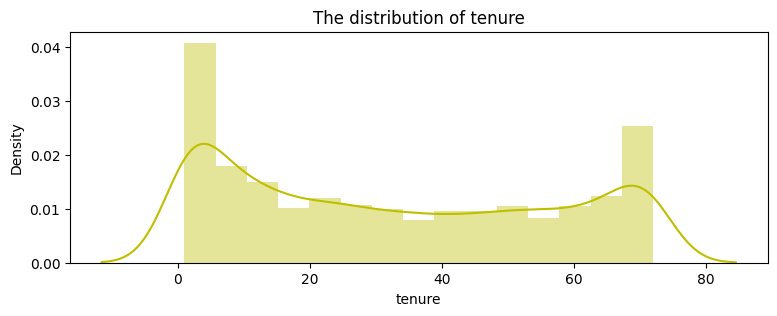

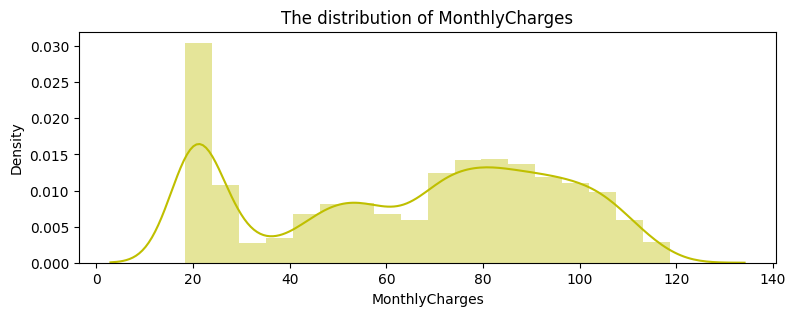

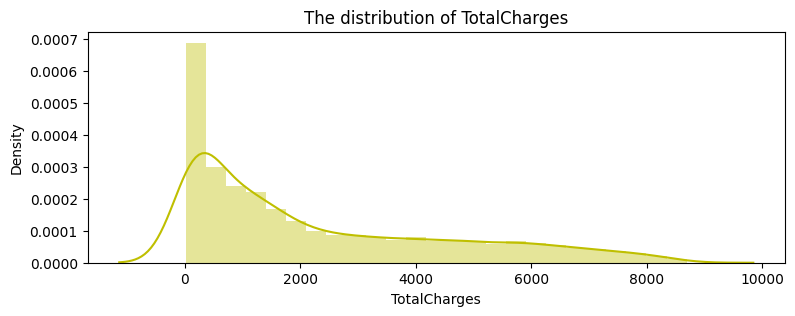

In [ ]:
#let's see the distribution of the numeric columns
#first I created a function to plot the distribution

warnings.filterwarnings("ignore")
for col in num_col:
    distributionPlot(col,customer_df)
warnings.filterwarnings("default")  # Back to normal

The numerical features are distributed over different value ranges , I will use the standard scaler to scale them down into the same range

In [ ]:
#Calculat the skewness of the distribution to confirm
for col in num_col:
    print(f'The skewnes of {col} : {customer_df[col].skew()}')

The skewnes of tenure : 0.23773083190513133
The skewnes of MonthlyCharges : -0.22210292770166232
The skewnes of TotalCharges : 0.9616424997242504


I'll apply a transformation to the TotalCharges variable because its distribution is right-skewed.
Since the skewness is moderate (not heavily skewed), I will use a square root transformation, which reduces moderate right skewness while preserving the order of the values

In [ ]:
# Check for negative values to apply sqrt
negatives = (customer_df['TotalCharges'] < 0).any()
print("Contains negative values:", negatives)

Contains negative values: False


In [ ]:
#let's do transformation for the TotalCharges : changing the shape of my dataset
customer_df['TotalCharges'] = np.sqrt(customer_df['TotalCharges'] )
# from sklearn.preprocessing import FunctionTransformer
# sqrt_transformer = FunctionTransformer(np.sqrt, inverse_func=np.expm1)
# customer_df['TotalCharges'] = sqrt_transformer.transform(customer_df[['TotalCharges']])

In [ ]:
warnings.filterwarnings("ignore")

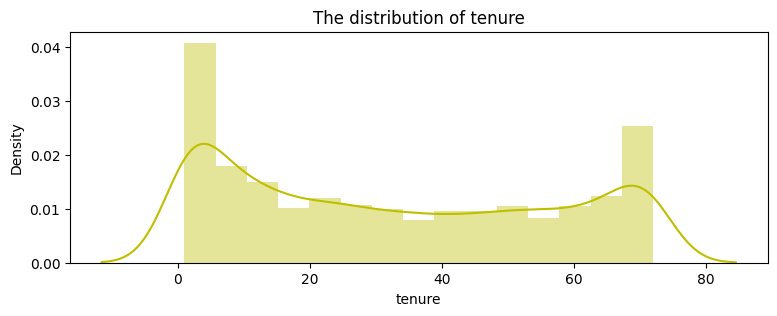

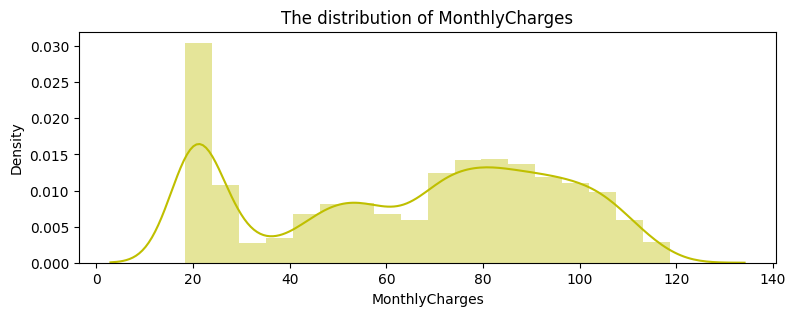

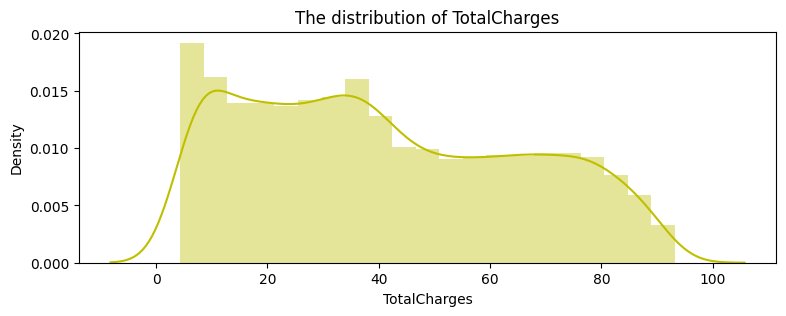

In [ ]:
#We can see the distribution after transformation
# warnings.filterwarnings("ignore")
for col in num_col:
    distributionPlot(col,customer_df)
# warnings.filterwarnings("default")  # Back to normal

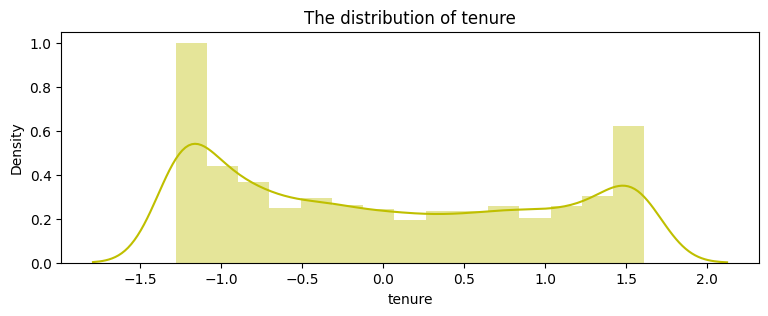

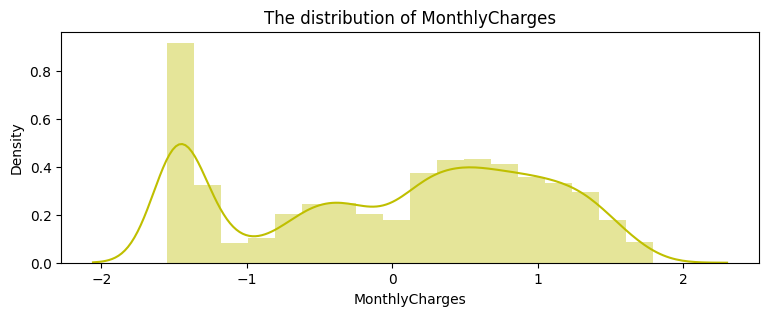

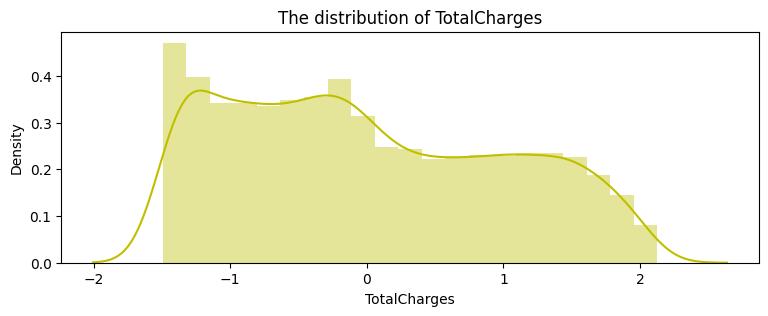

In [ ]:
df_std = pd.DataFrame(StandardScaler().fit_transform(customer_df[num_col].astype('float64')),columns=num_col)
# warnings.filterwarnings("ignore")
for col in num_col: 
    distributionPlot(col, df_std)
# warnings.filterwarnings("default")  # Back to normal

In [ ]:
#Feature scaling 
#let's apply my famous scaler 
scaling = StandardScaler()
customer_df[num_col]=scaling.fit_transform(customer_df[num_col])

In [ ]:
# encoders = {}
# #Categorical features 
# #The column :  contract  --> using maping manualy
# contract_to_month = {'Month-to-month':1,
#                      'One year' : 12 ,
#                      'Two year':24 
#                     }
# customer_df['Contract']=customer_df['Contract'].map(contract_to_month)

# #The column gender --> label Encoding
# glabel_encoder = LabelEncoder()
# customer_df['gender']= glabel_encoder.fit_transform(customer_df['gender'])


# #The column InetrnetService --> Using get dummies too create two categoris DSL or Fiber optic
# dummies = pd.get_dummies(customer_df['InternetService'],prefix='Internet')
#  #keep only DSL and fiber optic , skip NO -> to avoid multicollinearity
# dummies =dummies[['Internet_DSL','Internet_Fiber optic']]
# customer_df = pd.concat([customer_df,dummies],axis=1)
# #drop the InternetService column
# customer_df = customer_df.drop('InternetService',axis=1)


# #the column PaymentMethod --> using one hot encoding also
# # p_OneHotEncoder = OneHotEncoder(drop='first',sparse=False)
# # customer_df['PaymentMethod']=p_OneHotEncoder.fit_transform(customer_df['PaymentMethod'])
# customer_df = pd.get_dummies(customer_df,columns=['PaymentMethod'],prefix='PaymentMethod',drop_first=True)

# #the cat column with more then two categories ---
# #Using LabelEncoder
# cat_columns= ['Contract','gender', 'InternetService', 'PaymentMethod']

# #Yes NO columns : with the 3 possible values 
# yes_no_columns3 = ['MultipleLines','OnlineSecurity','OnlineBackup',
#                   'DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
# yes_no_map ={'Yes':1,'No': 0}
# for col in yes_no_columns3:
#     customer_df[col]=customer_df[col].map(yes_no_map)
#     customer_df[col]= customer_df[col].fillna(0)

# #Yes No columns with 2 possible values (YES/NO) and 
# #the taget column : 'Churn' --> labelEncoding
# yes_no_columns2 = ['Partner','Dependents','PhoneService','PaperlessBilling','Churn']
# c_labelencoder = LabelEncoder()
# for col1 in yes_no_columns2:
#     customer_df[col1] = c_labelencoder.fit_transform(customer_df[col1])

In [ ]:
# I changed the last code to save the encoders in the following dict
encoders = {}

# --- Contract column (manual mapping) ---
contract_to_month = {'Month-to-month': 1,
                     'One year': 12,
                     'Two year': 24}
customer_df['Contract'] = customer_df['Contract'].map(contract_to_month)
# Save the mapping manually into encoders
encoders['Contract'] = contract_to_month

# --- Gender column (LabelEncoder) ---
glabel_encoder = LabelEncoder()
customer_df['gender'] = glabel_encoder.fit_transform(customer_df['gender'])
encoders['gender'] = glabel_encoder

# --- InternetService column (get_dummies) ---
dummies = pd.get_dummies(customer_df['InternetService'], prefix='Internet')
dummies = dummies[['Internet_DSL', 'Internet_Fiber optic']]
customer_df = pd.concat([customer_df, dummies], axis=1)
customer_df = customer_df.drop('InternetService', axis=1)
# Save categories for reference
encoders['InternetService'] = list(dummies.columns)

# --- PaymentMethod column (get_dummies) ---
customer_df = pd.get_dummies(customer_df,
                             columns=['PaymentMethod'],
                             prefix='PaymentMethod',
                             drop_first=True)
# Save categories for reference
encoders['PaymentMethod'] = [col for col in customer_df.columns if "PaymentMethod_" in col]

# --- Yes/No columns (map) ---
yes_no_columns3 = ['MultipleLines','OnlineSecurity','OnlineBackup',
                   'DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
yes_no_map = {'Yes': 1, 'No': 0}
for col in yes_no_columns3:
    customer_df[col] = customer_df[col].map(yes_no_map)
    customer_df[col] = customer_df[col].fillna(0)
# Save mapping
encoders['yes_no_columns3'] = yes_no_map

# --- Yes/No columns + target (LabelEncoder) ---
c_labelencoder = LabelEncoder()
for col1 in ['Partner','Dependents','PhoneService','PaperlessBilling','Churn']:
    customer_df[col1] = c_labelencoder.fit_transform(customer_df[col1])
    encoders[col1] = c_labelencoder

# --- Save all encoders ---
with open("encoders.pkl", "wb") as f:
    pickle.dump(encoders, f)


In [ ]:
print(customer_df[yes_no_columns2].isna().sum())

Partner             0
Dependents          0
PhoneService        0
PaperlessBilling    0
Churn               0
dtype: int64


In [ ]:
customer_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Internet_DSL,Internet_Fiber optic,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,-1.280248,0,0.0,0.0,1.0,0.0,...,1,1,-1.161694,-1.448158,0,True,False,False,True,False
1,1,0,0,0,0.064303,1,0.0,1.0,0.0,1.0,...,12,0,-0.260878,0.100539,0,True,False,False,False,True
2,1,0,0,0,-1.239504,1,0.0,1.0,1.0,0.0,...,1,1,-0.363923,-1.247016,1,True,False,False,False,True
3,1,0,0,0,0.512486,0,0.0,1.0,0.0,1.0,...,12,0,-0.747850,0.077540,0,True,False,False,False,False
4,0,0,0,0,-1.239504,1,0.0,0.0,0.0,0.0,...,1,1,0.196178,-1.168976,1,False,True,False,True,False


# Preparing the data

In [ ]:
X = customer_df.drop('Churn',axis=1)
Y =customer_df.loc[:,'Churn']
print(X.shape)
print(Y.shape)

(7032, 22)
(7032,)


In [ ]:
x_train,x_,y_train,y_ = train_test_split(X,Y,test_size=0.4,random_state=42)

In [ ]:
x_test,x_cv,y_test,y_cv= train_test_split(x_,y_,test_size=0.5,random_state=42) 

In [ ]:
y_train.value_counts()

Churn
0    3084
1    1135
Name: count, dtype: int64

The dataset is imbalanced , so we need sampling method

# Model Building

In this part I will cover: (learn)
* Baseline creation
* Model creation
* Parameter tunning (manual,gridsearch,random search,basian optimiztion)
* Ensemble models

**Create a baseline model**

In [ ]:
customer_copie= customer_df

In [ ]:
customer_df['Churn'].value_counts(normalize=True)

Churn
0    0.734215
1    0.265785
Name: proportion, dtype: float64

The data is imbalanced so accuracy as an evaluation metric is a bad choice::

In [ ]:
#I will use naive bayes as a baseline model because it's quick and doesn't require mutch parameter tuning
from sklearn.naive_bayes import GaussianNB #--> numeric values
from sklearn.model_selection import cross_val_score
NB = GaussianNB()
nb_acc = cross_val_score(NB,#the model to evaluate
                         x_train,#training features
                         y_train.values.ravel(),#training labels (converted into 1D array)
                         cv=5,#number of folds (3-fold cross validation)
                         scoring='accuracy'#the metric
                        )
nb_f1 = cross_val_score(NB,#the model de evaluate 
                       x_train,#training features
                       y_train.values.ravel(),#training labels (into 1D array)
                       cv=5,
                       scoring ='f1'#the metric
                       )
print('NB accuracy :' + str(nb_acc))
print('NB f1 score : ' + str(nb_f1))
print('NB accuracy mean : '+str(nb_acc.mean()) + ' | NB f1 score mean :' + str(nb_f1.mean()))
print('------------------------')
                                                                               
# model.fit(x_train,) --> I don't need it , I need only in the final model


NB accuracy :[0.75       0.74170616 0.77962085 0.75947867 0.78410439]
NB f1 score : [0.61284404 0.56916996 0.63671875 0.62476895 0.651341  ]
NB accuracy mean : 0.7629820152580774 | NB f1 score mean :0.6189685379471405
------------------------


One of the drawbacks of Naive Bayes is that it has virtually no paramaters that we can tune, so our inital results are about the best we will get with it without making changes to our data.

After we have a baseline model to compare againt , we want to evaluate how other models might perform on the same data
I like to experiment with other basic models with very little paramater tuning to see what performs well

In [ ]:
#Logistic regression 
LR = LogisticRegression(max_iter=150)
LR_accuracy = cross_val_score(LR,x_train,y_train.values.ravel(),cv=5,scoring='f1')
print('LR f1 score :'+str(LR_accuracy))
print('L1 f1 score mean: '+str(LR_accuracy.mean()))

LR f1 score :[0.59903382 0.54683544 0.5914787  0.60487805 0.63366337]
L1 f1 score mean: 0.5951778742644144


In [ ]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT_accuracy =  cross_val_score(DT,x_train,y_train.values.ravel(),cv=5,scoring='accuracy')
DT_f1 = cross_val_score(DT,x_train,y_train.values.ravel(),cv=5,scoring='f1')
# print('DT accuracy : '+str(DT_accuracy))
print('DT f1 score : '+str(DT_f1))
print('NB accuracy mean : '+str(DT_accuracy.mean()) + ' | NB f1 score mean :' + str(DT_f1.mean()))

DT f1 score : [0.5232816  0.48472505 0.51948052 0.47659574 0.4988764 ]
NB accuracy mean : 0.7283733337830924 | NB f1 score mean :0.5005918632049156


In [ ]:
#KNN 
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN_f1 = cross_val_score(KNN,x_train,y_train.values.ravel(),cv=5,scoring='f1')
print( 'KNN f1 score : ' +str(KNN_f1))
print('KNN f1 score mean : ' +str(KNN_f1.mean()))

KNN f1 score : [0.54004577 0.49545455 0.56235828 0.59009009 0.59310345]
KNN f1 score mean : 0.5562104254109755


In [ ]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,x_train,y_train.values.ravel(),cv=5,scoring='f1')
print(cv)
print(cv.mean())

[0.55940594 0.51485149 0.58064516 0.57635468 0.55026455]
0.5563043634200805


In [ ]:
#SVC
from sklearn.svm import SVC

svc = SVC(probability = True)
cv = cross_val_score(svc,x_train,y_train.values.ravel(),cv=5,scoring ='f1')
print(cv)
print(cv.mean())

[0.5743073  0.53229974 0.54780362 0.61083744 0.61068702]
0.575187025056686


In [ ]:
#XGboost
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state =1)
cv = cross_val_score(xgb,x_train,y_train.values.ravel(),cv=5,scoring='f1')
print(cv)
print(cv.mean())

[0.5631068  0.50823529 0.57004831 0.5627907  0.57985258]
0.5568067353879789


In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

# Create SGD classifier
sgd = SGDClassifier(
    loss='log_loss',  # For logistic regression
    penalty='l2',     # L2 regularization
    alpha=0.0001,     # Regularization strength
    random_state=42,
    max_iter=1000,
    tol=1e-3
)

# Test with cross-validation
sgd_f1 = cross_val_score(sgd, x_train, y_train, cv=5, scoring='f1')
print(f"SGD F1 score: {sgd_f1.mean():.3f}")

SGD F1 score: 0.576


| Model | F1 Score | Accuracy |
|-------|----------|----------|
| Naive Bayes | 0.85 |  |
| Random Forest | 0.83 | 0.80 |
| Logistic Regression | 0.81 | 0.79 |

# Manual parameter tuning

Because I'm learning , I will try with KNN the manual parameter tuning 

In [ ]:
# for i in range(1,7):
#     Knn = KNeighborsClassifier(n_neighbors=i)
#     knn_f1 = cross_val_score(knn,x_train,y_train.values.ravel(),cv=5,scoring='f1')
#     print('K ='+(str(i)) + (': ') + str(knn_f1.mean()))
from sklearn.model_selection import cross_val_score

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train.values.ravel(), cv=5, scoring='f1')
    print(f"k={k}, mean F1={scores.mean():.4f}")


k=1, mean F1=0.4935
k=2, mean F1=0.4093
k=3, mean F1=0.5481
k=4, mean F1=0.4959
k=5, mean F1=0.5562
k=6, mean F1=0.5250
k=7, mean F1=0.5693
k=8, mean F1=0.5437
k=9, mean F1=0.5787
k=10, mean F1=0.5609
k=11, mean F1=0.5824
k=12, mean F1=0.5658
k=13, mean F1=0.5823
k=14, mean F1=0.5670
k=15, mean F1=0.5841
k=16, mean F1=0.5725
k=17, mean F1=0.5935
k=18, mean F1=0.5805
k=19, mean F1=0.5919
k=20, mean F1=0.5772


Because I'm learning , i'll try the VotingClassifier 
It's an ensemble method — it combines predictions from multiple models to make a final decision.
* Hard voting : Each model votes for a class (e.g., churn = 1, no churn = 0).
* Soft voting : Each model outputs a probability (confidence) instead of a direct vote.

In [ ]:
from sklearn.ensemble import VotingClassifier
clf_voting = VotingClassifier(
    estimators=[
        ('lr',LR),
        ('dt',DT),
        ('svc',svc),
        ('knn',KNN)
],voting ='soft')

In [ ]:
v_clf = cross_val_score(clf_voting,x_train,y_train.values.ravel(),cv=5,scoring='f1')
print(v_clf)
print(v_clf.mean())

[0.57212714 0.51084337 0.5764411  0.56038647 0.61772152]
0.567503921606493


In [ ]:
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}

In [ ]:
hyperparameters = {
    "Random Forest" :{
        "n_estimators": [50,100, 200],
        "max_depth": [5, 10, None],
    },
    "XGBoost":{
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 5, 7],
    }
}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
best_models = {}
for model_name , model in models.items():
    print(f"Tunning {model_name}......")
    grid = GridSearchCV(estimator=model, param_grid=hyperparameters[model_name], cv=5, scoring = "accuracy")
    grid.fit(x_train, y_train)
    best_models[model_name] =grid.best_estimator_
    print(f"Best parameters for {model_name} : {grid.best_params_}")
    print(f"Best Accuracy for {model_name} : {grid.best_score_: .2f}\n")

Tunning Random Forest......
Best parameters for Random Forest : {'max_depth': 10, 'n_estimators': 200}
Best Accuracy for Random Forest :  0.80

Tunning XGBoost......
Best parameters for XGBoost : {'learning_rate': 0.1, 'max_depth': 5}
Best Accuracy for XGBoost :  0.80



In [ ]:
best_models

{'Random Forest': RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42),
 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.1, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=5, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, random_state=42, ...)}

In [ ]:
with open("best_model.pkl", "wb") as f:
    pickle.dump(best_models['Random Forest'], f)

In [ ]:
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaling, f)

In [ ]:
y_test_pred = best_models['Random Forest'].predict(x_test)
y_test_prob = best_models['Random Forest'].predict_proba(x_test)[:, 1]

In [ ]:
y_test_pred

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
y_test_prob

array([0.01545057, 0.48930174, 0.35035137, ..., 0.20449932, 0.50074544,
       0.36405693])

In [ ]:
print(f"Accuracy : ", accuracy_score(y_test, y_test_pred))
print(f"ROC - AUC Score : ", roc_auc_score(y_test, y_test_pred))
print(f"Confusion Matrix : \n", confusion_matrix(y_test, y_test_pred))
print(f"Classification Report : \n", classification_report(y_test, y_test_pred))

Accuracy :  0.8051209103840683
ROC - AUC Score :  0.7022836463467899
Confusion Matrix : 
 [[952  82]
 [192 180]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.92      0.87      1034
           1       0.69      0.48      0.57       372

    accuracy                           0.81      1406
   macro avg       0.76      0.70      0.72      1406
weighted avg       0.79      0.81      0.79      1406



In [ ]:
def make_prediction(input_data):
    input_df = pd.DataFrame([input_data])
    # for col, encoder in encoders.items():
    #     input_df[col] = encoder.transform(input_df[col])
    # numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
    # input_df[numerical_cols] = scaler_data.transform(input_df[numerical_cols])
    prediction = loaded_model.predict(input_df)[0]
    probability = loaded_model.predict_proba(input_df)[0, 1]
    return "Churn" if prediction == 1 else "No Churn", probability

In [ ]:
example_input = {
    'gender': 'Female',
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    'Dependents': 'No',
    'tenure': 1,
    'PhoneService': 'No',
    'MultipleLines': 'No phone service',
    'InternetService': 'DSL',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'No',
    'StreamingMovies': 'No',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 29.85,
    'TotalCharges': 29.85
}

In [ ]:
print(f"Prediction: {prediction}, Probability : {prob : .2f}")

In [ ]:
# Flask Framework web application